In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:

# Task 2: Fetching Datasets
df1 = pd.read_csv('electric_vehicle_charging_station_list.csv')
df2 = pd.read_csv('Electric_Vehicle_Population_Data.csv')
df3 = pd.read_csv('ElectricCarData_Norm.csv')
df4 = pd.read_csv('EV Stats-1.csv')

In [3]:
# Task 3: Exploratory Data Analysis (EDA)
print('DF1 Shape: ', df1.shape)
print('DF2 Shape: ', df2.shape)
print('DF3 Shape: ', df3.shape)
print('DF4 Shape: ', df4.shape)


DF1 Shape:  (202, 9)
DF2 Shape:  (79767, 15)
DF3 Shape:  (103, 14)
DF4 Shape:  (35, 10)


In [4]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   no          202 non-null    int64  
 1   region      202 non-null    object 
 2   address     202 non-null    object 
 3   aux addres  202 non-null    object 
 4   latitude    202 non-null    float64
 5   longitude   202 non-null    float64
 6   type        202 non-null    object 
 7   power       202 non-null    object 
 8   service     202 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 14.3+ KB
None


In [59]:
df2.head(3) 


,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location
0,WA1AAAGE2M,Kitsap,POULSBO,WA,98370,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,23.0,148815901,POINT (-122.63339300000001 47.748427)
1,WBY8P2C00L,King,SEATTLE,WA,98122,2020,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,37.0,132197810,POINT (-122.303413 47.61065)
2,5YJXCBE21K,Cowlitz,SILVERLAKE,WA,98645,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,20.0,154341673,POINT (-122.772699 46.320526)


In [8]:
d1 = df1.describe()
d2 = df2.describe()
d3 = df3.describe()
d4 = df4.describe()
print(d1, d2, d3, d4)


               no    latitude   longitude
count  202.000000  202.000000  202.000000
mean   101.500000   25.960987   78.418002
std     58.456537    5.616108    3.097664
min      1.000000    8.481051   76.277781
25%     51.250000   28.535516   77.212996
50%    101.500000   28.580286   77.226252
75%    151.750000   28.617783   77.375216
max    202.000000   28.642892   88.509064            ZIP Code    Model Year  Electric Range      Base MSRP  \
count  79767.000000  79767.000000    79767.000000   79767.000000   
mean   98175.310717   2017.628593      124.564657    2944.268244   
std     2421.827066      2.575634      102.889970   13198.091967   
min     1731.000000   1993.000000        0.000000       0.000000   
25%    98052.000000   2016.000000       25.000000       0.000000   
50%    98121.000000   2018.000000       84.000000       0.000000   
75%    98370.000000   2020.000000      215.000000       0.000000   
max    99403.000000   2022.000000      337.000000  845000.000000   

       Le

In [62]:

# Clean column names for consistency
def clean_column_names(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
    return df

df1 = clean_column_names(df1)
df2 = clean_column_names(df2)
df3 = clean_column_names(df3)
df4 = clean_column_names(df4)

# Drop unnecessary columns (if they exist)
drop_cols_df2 = ["vin_(1-10)", "dol_vehicle_id"]
df2 = df2.drop(columns=[col for col in drop_cols_df2 if col in df2.columns], errors="ignore")

drop_cols_df4 = ["sl._no"]
df4 = df4.drop(columns=[col for col in drop_cols_df4 if col in df4.columns], errors="ignore")

# Convert numerical columns (handling errors)
numeric_cols_df3 = ["accel", "topspeed", "range", "efficiency", "priceeuro"]
for col in numeric_cols_df3:
    if col in df3.columns:
        df3[col] = pd.to_numeric(df3[col], errors="coerce")

# Fill missing values with median
df2.fillna(df2.median(numeric_only=True), inplace=True)
df3.fillna(df3.median(numeric_only=True), inplace=True)
df4.fillna(df4.median(numeric_only=True), inplace=True)

# Display dataset summaries
df1.info(), df2.info(), df3.info(), df4.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   no          202 non-null    int64  
 1   region      202 non-null    object 
 2   address     202 non-null    object 
 3   aux_addres  202 non-null    object 
 4   latitude    202 non-null    float64
 5   longitude   202 non-null    float64
 6   type        202 non-null    object 
 7   power       202 non-null    object 
 8   service     202 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 14.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79767 entries, 0 to 79766
Data columns (total 13 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   county                                             79762 non-null  object 
 1   city                        

(None, None, None, None)

# Map of Charging Stations (Latitude & Longitude)

In [10]:
import folium
from folium.plugins import MarkerCluster

# Create a map centered at an average latitude & longitude
map_center = [df1['latitude'].mean(), df1['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=6)

# Add marker clusters
marker_cluster = MarkerCluster().add_to(m)

# Plot each charging station
for idx, row in df1.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Address: {row['address']}\nType: {row['type']}\nPower: {row['power']}",
        icon=folium.Icon(color="green", icon="bolt", prefix="fa"),
    ).add_to(marker_cluster)

# Display map
m


# Count of Charging Stations by Region

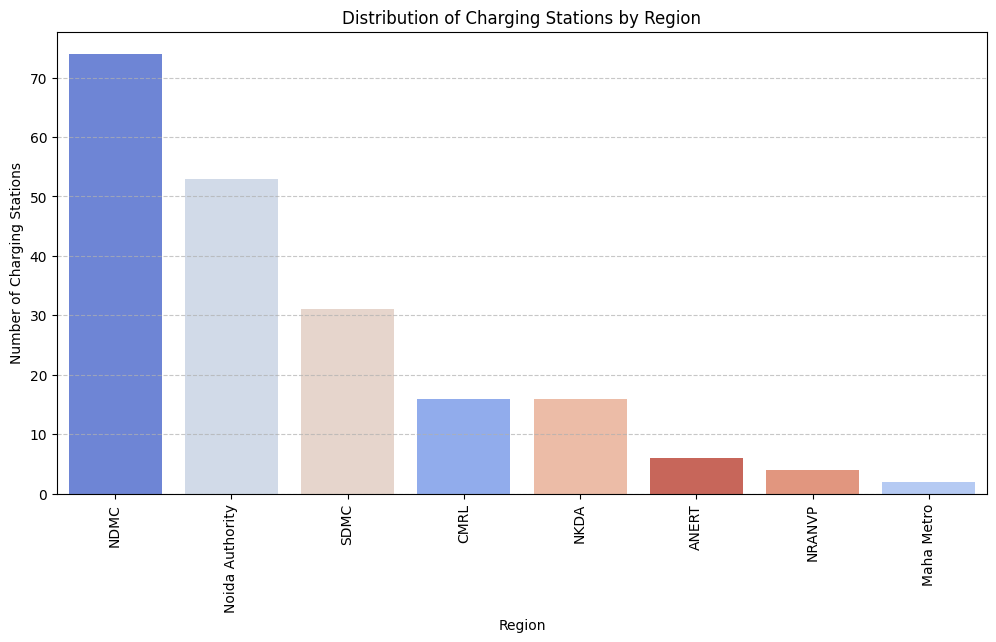

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='region', order=df1['region'].value_counts().index, hue='region', palette='coolwarm', legend=False)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Number of Charging Stations')
plt.title('Distribution of Charging Stations by Region')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Distribution of Charging Station Types

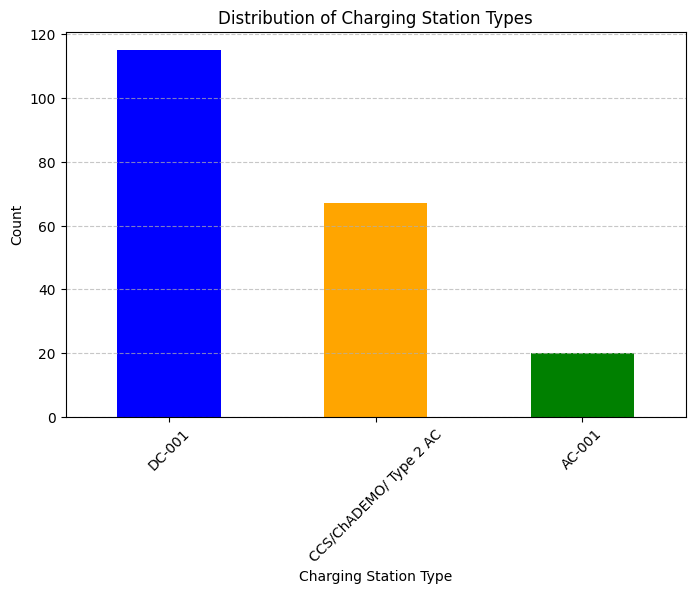

In [12]:
plt.figure(figsize=(8, 5))
df1['type'].value_counts().plot(kind='bar', color=['blue', 'orange', 'green'])
plt.xlabel('Charging Station Type')
plt.ylabel('Count')
plt.title('Distribution of Charging Station Types')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Distribution of Electric Vehicle Types

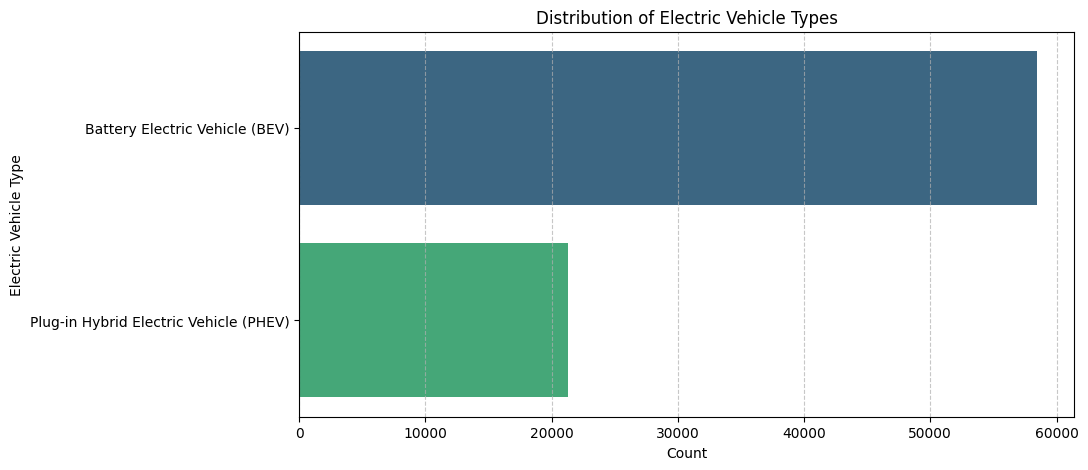

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df2, y='Electric Vehicle Type', 
              order=df2['Electric Vehicle Type'].value_counts().index, 
              palette='viridis', hue='Electric Vehicle Type', dodge=False, legend=False)
plt.xlabel('Count')
plt.ylabel('Electric Vehicle Type')
plt.title('Distribution of Electric Vehicle Types')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



# Top 10 Car Manufacturers Producing EVs

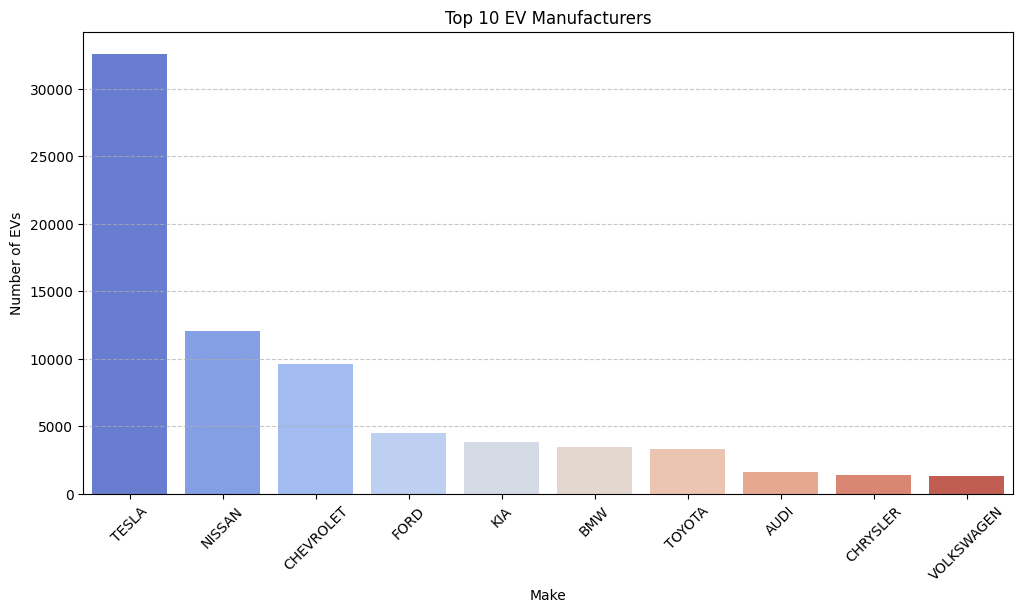

In [14]:
plt.figure(figsize=(12, 6))

top_makes = df2['Make'].value_counts().nlargest(10)
sns.barplot(x=top_makes.index, y=top_makes.values, palette='coolwarm', hue=top_makes.index, dodge=False, legend=False)

plt.xlabel('Make')
plt.ylabel('Number of EVs')
plt.title('Top 10 EV Manufacturers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Distribution of Electric Range

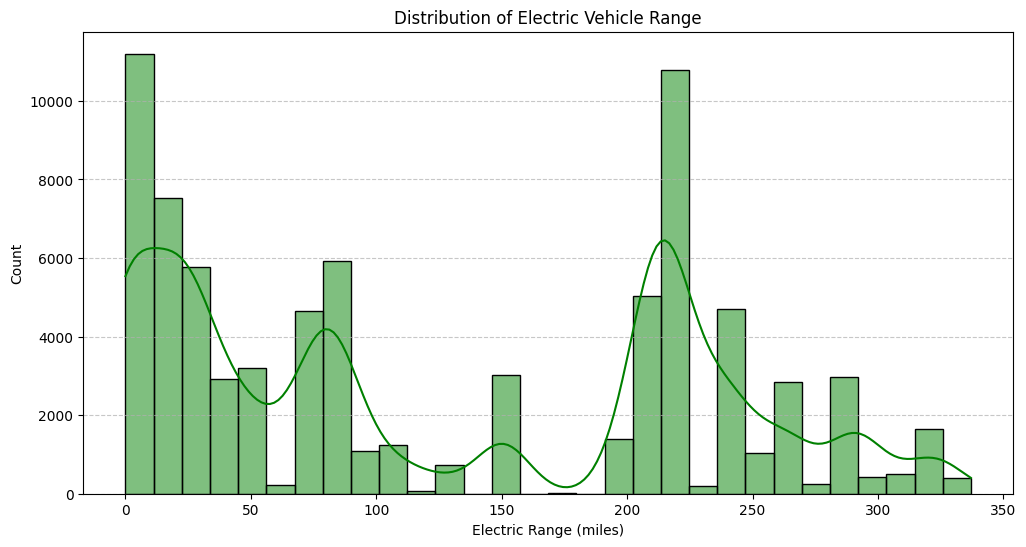

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(df2['Electric Range'], bins=30, kde=True, color='green')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Count')
plt.title('Distribution of Electric Vehicle Range')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# EVs Count by State

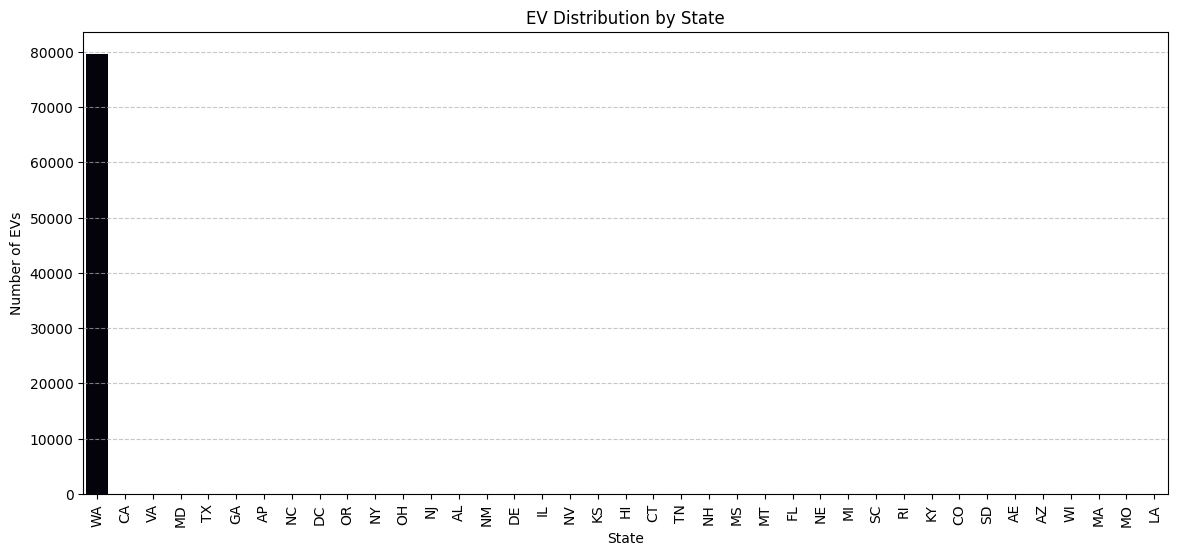

In [16]:
plt.figure(figsize=(14, 6))

state_counts = df2['State'].value_counts()
sns.barplot(x=state_counts.index, y=state_counts.values, palette='magma', hue=state_counts.index, dodge=False, legend=False)

plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Number of EVs')
plt.title('EV Distribution by State')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Relationship Between MSRP and Electric Range

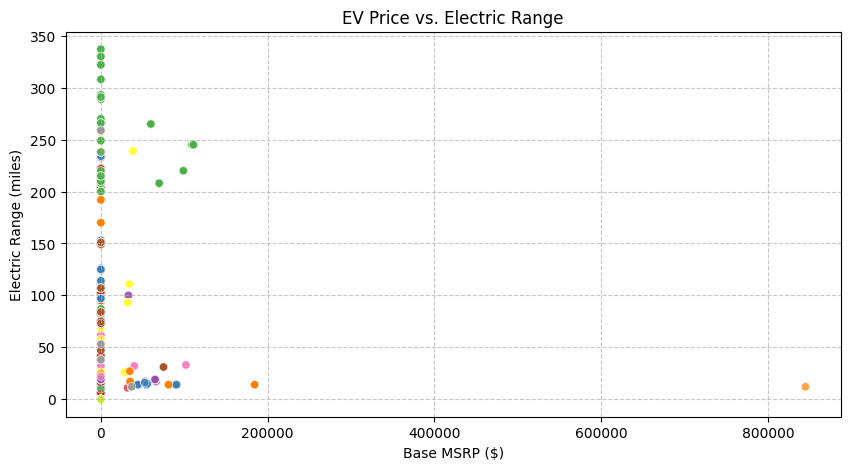

In [17]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df2, x='Base MSRP', y='Electric Range', hue='Make', alpha=0.7, palette='Set1')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Electric Range (miles)')
plt.title('EV Price vs. Electric Range')
plt.legend([], [], frameon=False)  # Hide legend if too many brands
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# Yearly Trend of EV Registration

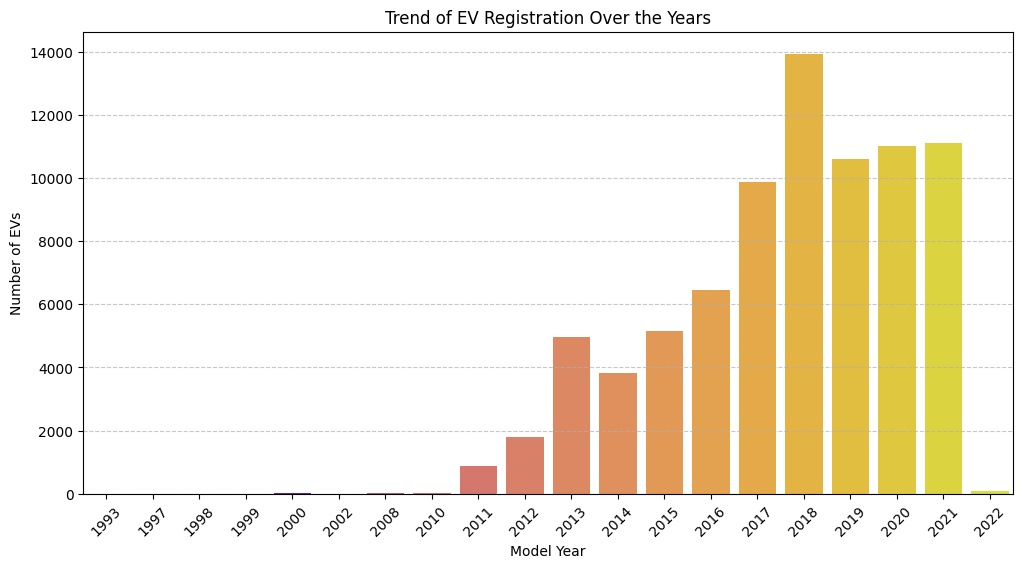

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df2, x='Model Year', hue='Model Year', palette='plasma', legend=False)
plt.xlabel('Model Year')
plt.ylabel('Number of EVs')
plt.title('Trend of EV Registration Over the Years')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Distribution of Electric Vehicle Brands

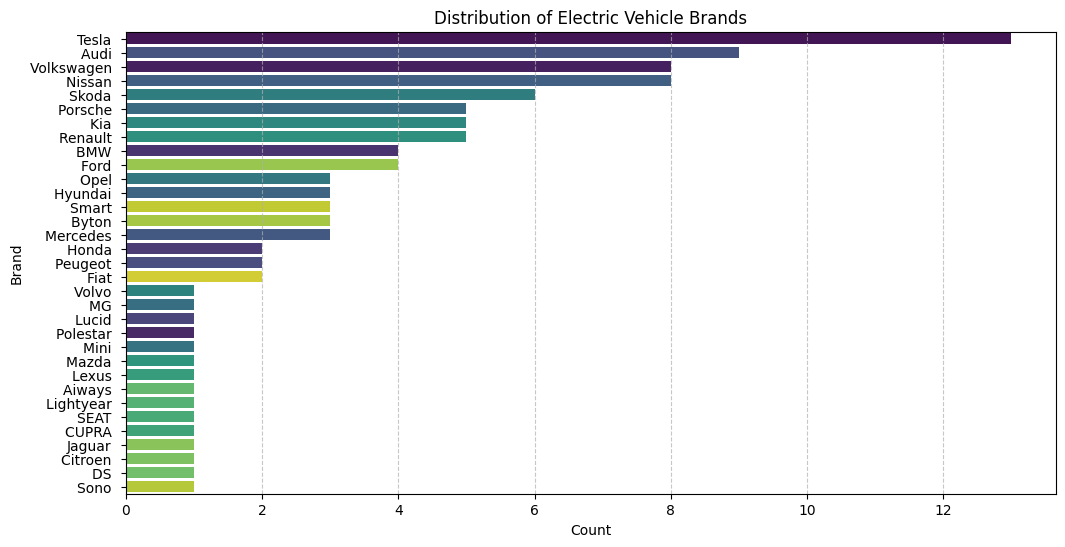

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df3, y='Brand', order=df3['Brand'].value_counts().index, hue='Brand', palette='viridis', legend=False)
plt.xlabel("Count")
plt.ylabel("Brand")
plt.title("Distribution of Electric Vehicle Brands")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# Acceleration vs. Top Speed Scatter Plot

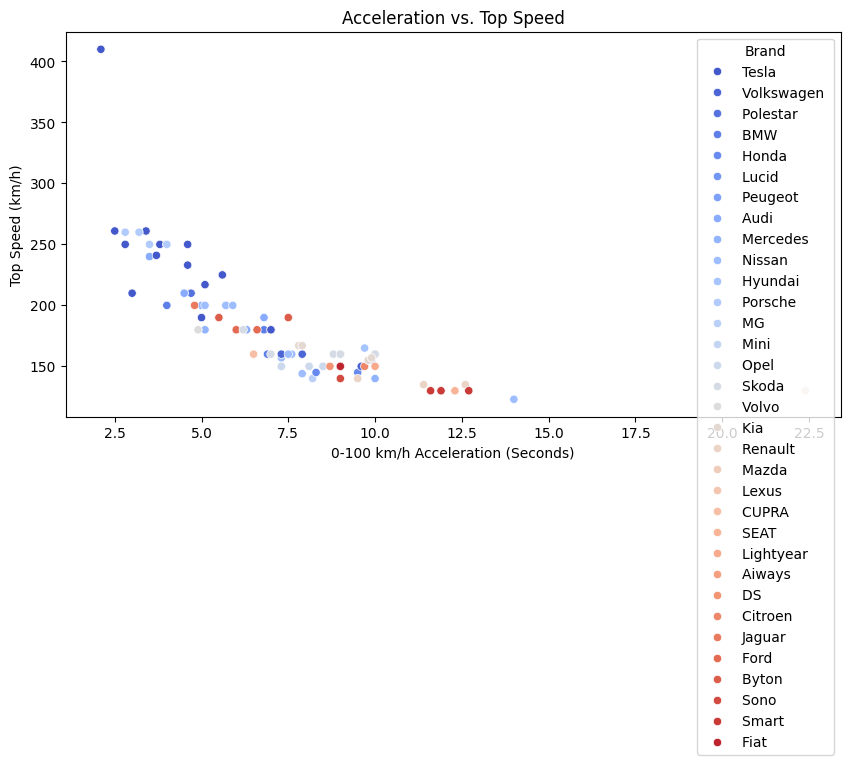

In [50]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df3, x='Accel', y='TopSpeed', hue='Brand', palette='coolwarm')
plt.xlabel("0-100 km/h Acceleration (Seconds)")
plt.ylabel("Top Speed (km/h)")
plt.title("Acceleration vs. Top Speed")
plt.show()


# EV Range Distribution

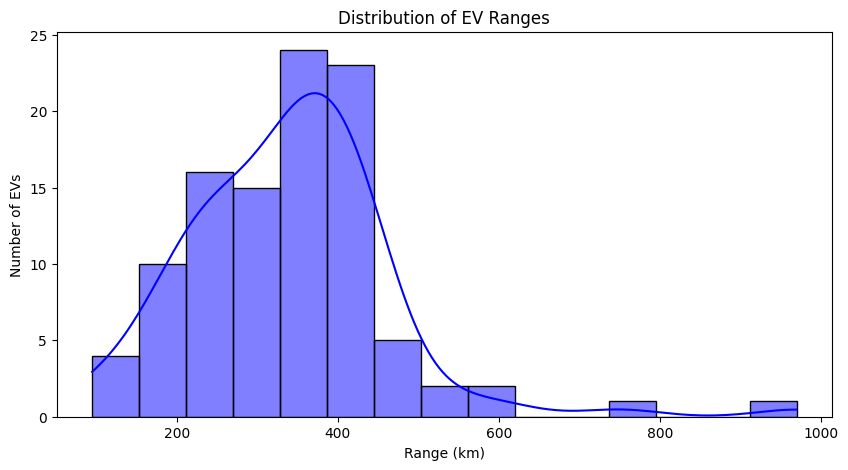

In [51]:
plt.figure(figsize=(10, 5))
sns.histplot(df3['Range'], bins=15, kde=True, color='blue')
plt.xlabel("Range (km)")
plt.ylabel("Number of EVs")
plt.title("Distribution of EV Ranges")
plt.show()


# EV Efficiency (Wh/km) Distribution

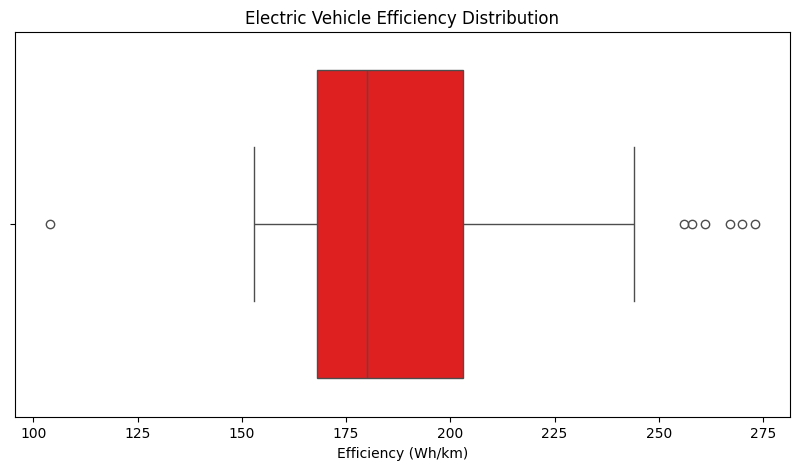

In [40]:
df3['Efficiency'] = df3['Efficiency'].str.replace(' Wh/km', '').astype(float)

plt.figure(figsize=(10, 5))
sns.boxplot(data=df3, x='Efficiency', color='red')
plt.xlabel("Efficiency (Wh/km)")
plt.title("Electric Vehicle Efficiency Distribution")
plt.show()


# Price vs. Range Scatter Plot

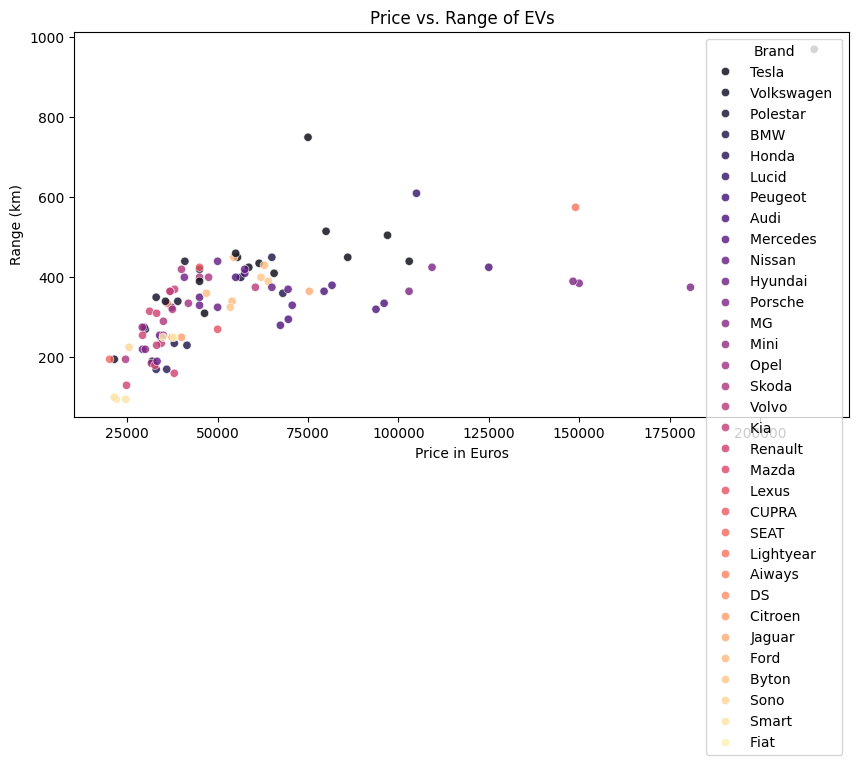

In [41]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df3, x='PriceEuro', y='Range', hue='Brand', palette='magma', alpha=0.8)
plt.xlabel("Price in Euros")
plt.ylabel("Range (km)")
plt.title("Price vs. Range of EVs")
plt.show()


# Body Style Distribution

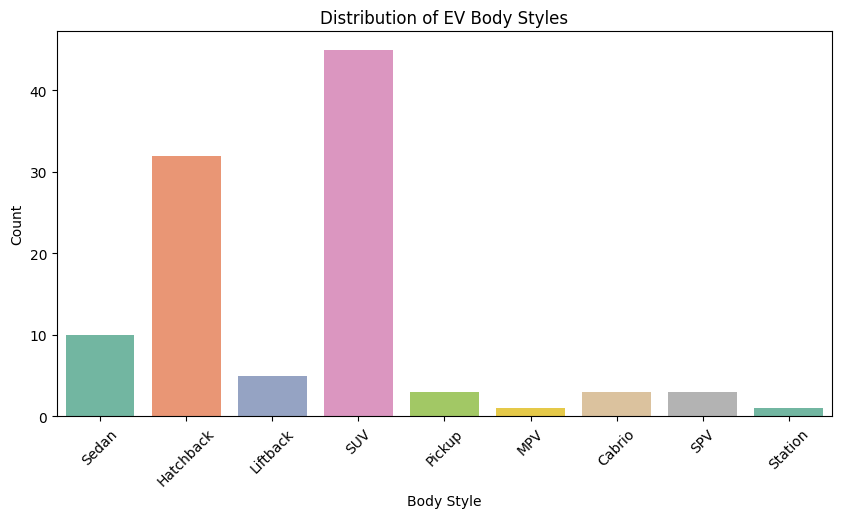

In [52]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df3, x='BodyStyle', hue='BodyStyle', palette='Set2', legend=False)  # Fix applied
plt.xlabel("Body Style")
plt.ylabel("Count")
plt.title("Distribution of EV Body Styles")
plt.xticks(rotation=45)
plt.show()


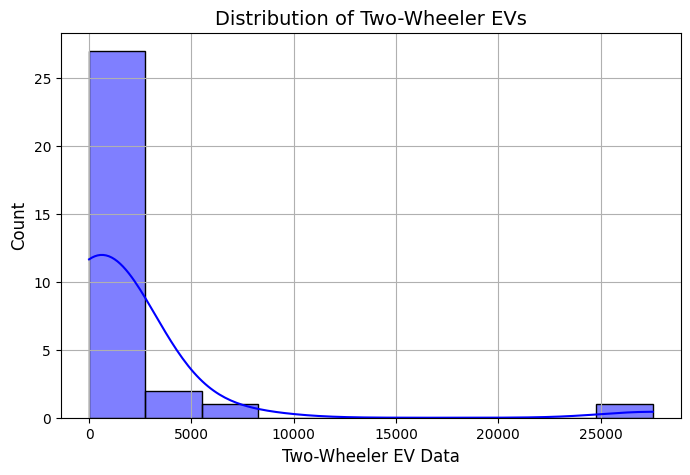

In [19]:
# Standardizing column names (optional, but helpful)
df4.columns = df4.columns.str.strip()  # Remove leading/trailing spaces

# Selecting the most relevant column (Assuming L1 & L2 category represents Two-Wheeler data)
two_wheeler_col = 'Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules'

# Check if the column exists
if two_wheeler_col in df4.columns:
    # Convert to numeric
    df4[two_wheeler_col] = pd.to_numeric(df4[two_wheeler_col], errors='coerce')

    # Drop NaN values
    two_wheeler_data = df4[two_wheeler_col].dropna()

    # Check if we have valid data
    if not two_wheeler_data.empty:
        plt.figure(figsize=(8, 5))
        sns.histplot(two_wheeler_data, bins=10, kde=True, color='blue')
        plt.title('Distribution of Two-Wheeler EVs', fontsize=14)
        plt.xlabel('Two-Wheeler EV Data', fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.grid(True)
        plt.show()
    else:
        print("No valid data available for Two-Wheelers in df4.")
else:
    print(f"Error: Column '{two_wheeler_col}' is missing in df4.")


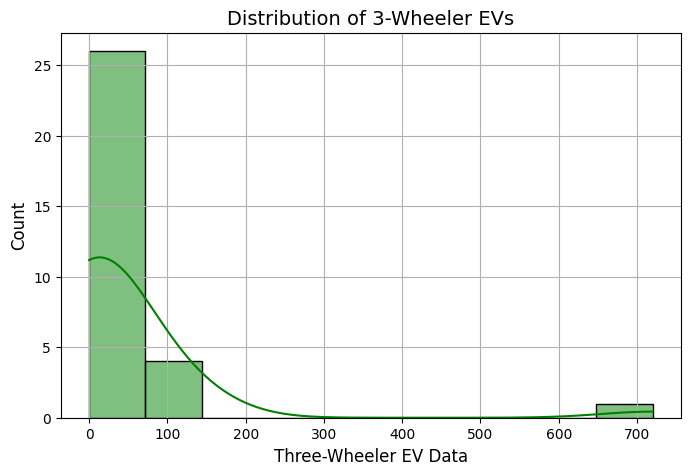

In [20]:

# Standardizing column names (optional, but helpful)
df4.columns = df4.columns.str.strip()  # Remove any leading/trailing spaces

# Selecting the most relevant column for 3-Wheelers
three_wheeler_col = 'Three Wheelers (Category L5 as per CMVR)'

# Check if the column exists
if three_wheeler_col in df4.columns:
    # Convert to numeric
    df4[three_wheeler_col] = pd.to_numeric(df4[three_wheeler_col], errors='coerce')

    # Drop NaN values
    three_wheeler_data = df4[three_wheeler_col].dropna()

    # Check if we have valid data
    if not three_wheeler_data.empty:
        plt.figure(figsize=(8, 5))
        sns.histplot(three_wheeler_data, bins=10, kde=True, color='green')
        plt.title('Distribution of 3-Wheeler EVs', fontsize=14)
        plt.xlabel('Three-Wheeler EV Data', fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.grid(True)
        plt.show()
    else:
        print("No valid data available for Three-Wheelers in df4.")
else:
    print(f"Error: Column '{three_wheeler_col}' is missing in df4.")


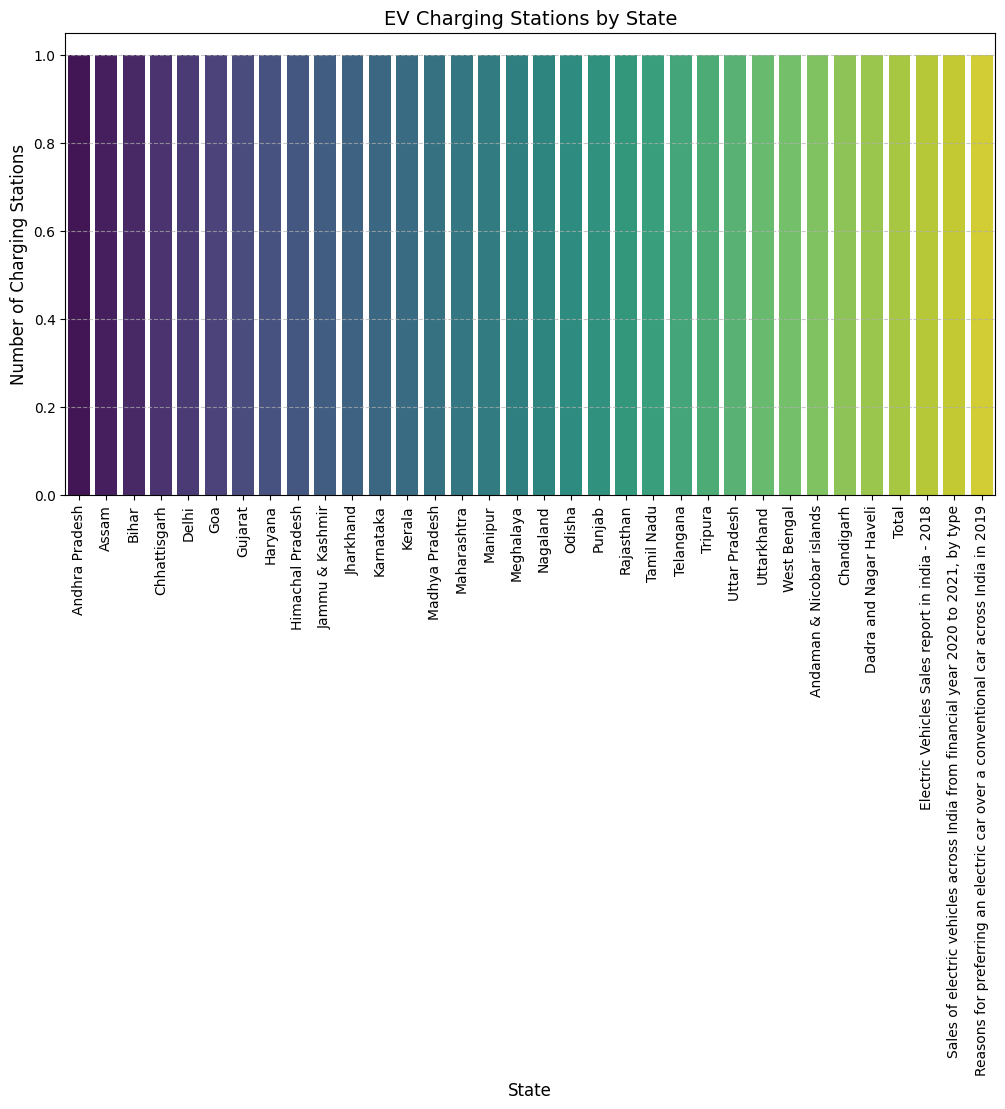

In [21]:
# Check if 'State' column exists in df4
if 'State' in df4.columns:
    # Count the number of charging stations per state in df4
    charging_stations_by_state = df4['State'].value_counts().reset_index()
    charging_stations_by_state.columns = ['State', 'Count']

    # Plot the distribution
    plt.figure(figsize=(12, 6))
    sns.barplot(data=charging_stations_by_state, x='State', y='Count', hue='State', palette="viridis", legend=False)

    # Improve readability
    plt.xticks(rotation=90)
    plt.xlabel('State', fontsize=12)
    plt.ylabel('Number of Charging Stations', fontsize=12)
    plt.title('EV Charging Stations by State', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Show the plot
    plt.show()
else:
    print("Error: Column 'State' is missing in df4.")


In [22]:
# Encoding categorical variables
if 'Category' in df2.columns:
    df2['Category'] = LabelEncoder().fit_transform(df2['Category'])    
    plt.figure(figsize=(12,6))


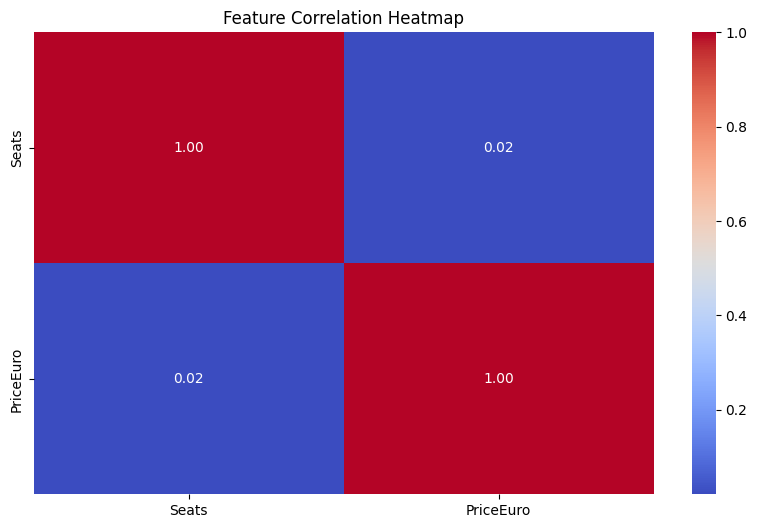

In [23]:
# Select only numeric columns
numeric_df3 = df3.select_dtypes(include=['number'])

# Visualizing correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df3.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


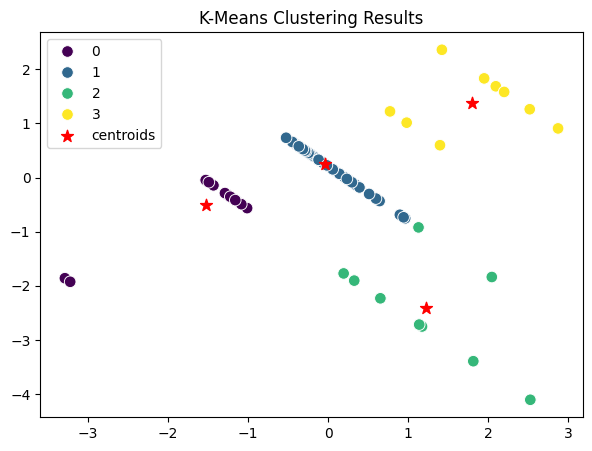

In [24]:
# Model Building Using K-Means Clustering
features = df3.select_dtypes(include=['float64', 'int64']).dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_features)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmeans.fit(X_pca)
df3['Cluster'] = kmeans.labels_

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans.labels_, palette='viridis', s=70)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

In [25]:
# Ensure 'Range' column is numeric
if 'Range' in df3.columns:
    df3['Range'] = df3['Range'].astype(str).str.extract('(\d+)').astype(float)  # Convert 'Range' to float

    # Define features (X) and target (y)
    X = df3.drop(columns=['Range', 'Cluster'], errors='ignore').select_dtypes(include=['float64', 'int64']).dropna()
    y = df3['Range'].dropna()
    
    if len(X) > 0 and len(y) > 0:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        models = {
            'Linear Regression': LinearRegression(),
            'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
            'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
        }
        
        results = {}
        for name, model in models.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            results[name] = {'MSE': mse, 'R2': r2}
            print(f'{name} -> MSE: {mse}, R2 Score: {r2}')


Linear Regression -> MSE: 11844.734792917447, R2 Score: 0.10832385181601645
Random Forest -> MSE: 12967.818680985445, R2 Score: 0.023777668815045505
XGBoost -> MSE: 16406.132572743965, R2 Score: -0.2350599109916336


In [26]:
# Choosing the best model
best_model = max(results, key=lambda k: results[k]['R2'])
print(f'Best Performing Model: {best_model}')

Best Performing Model: Linear Regression


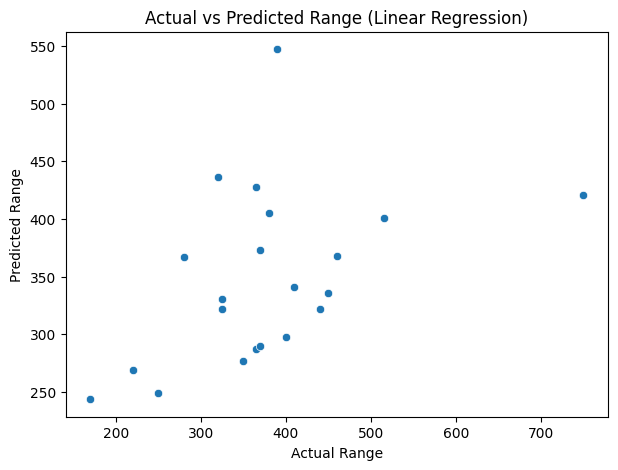

In [27]:
# Visualizing Predictions
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=models[best_model].predict(X_test))
plt.xlabel('Actual Range')
plt.ylabel('Predicted Range')
plt.title(f'Actual vs Predicted Range ({best_model})')
plt.show()

# Early Market Sales

In [69]:

def calculate_potential_sales(target_customers, adoption_rate, avg_deal_size):
    """
    Calculates potential sales revenue in the early market.
    
    Parameters:
    target_customers (int): Total number of target business customers (SOM).
    adoption_rate (float): Estimated percentage of early adopters (in decimal form, e.g., 0.1 for 10%).
    avg_deal_size (float): Average revenue per customer.
    
    Returns:
    float: Estimated potential sales revenue.
    """
    potential_sales = target_customers * adoption_rate * avg_deal_size
    return potential_sales

# Example Inputs
target_customers = 5000   # Example: Number of businesses in the early market
adoption_rate = 0.10      # 10% early adopters
avg_deal_size = 5000      # Average deal size in dollars

# Calculate Sales Potential
estimated_sales = calculate_potential_sales(target_customers, adoption_rate, avg_deal_size)

# Print Results
print(f"Estimated Potential Sales Revenue: ${estimated_sales:,.2f}")


Estimated Potential Sales Revenue: $2,500,000.00
